<a href="https://colab.research.google.com/github/NeonLabs146/General_stuffs/blob/main/ML_Standardization_vs_Normalization_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import math

In [ ]:
df=pd.read_csv('DIS.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,02/02/2022,144.190002,144.589996,141.380005,142.619995,142.619995,9529900,DIS
1,03/02/2022,140.000000,142.039993,139.250000,140.029999,140.029999,9820600,DIS
2,04/02/2022,140.039993,143.190002,139.529999,142.020004,142.020004,8061100,DIS
3,07/02/2022,143.389999,144.089996,141.610001,142.509995,142.509995,10937500,DIS
4,08/02/2022,141.789993,142.889999,140.740005,142.479996,142.479996,9231700,DIS


Linear Regression

In [ ]:
df=df[['Open','High','Low','Close','Adj Close', 'Volume']]

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
0,144.190002,144.589996,141.380005,142.619995,142.619995,9529900
1,140.000000,142.039993,139.250000,140.029999,140.029999,9820600
2,140.039993,143.190002,139.529999,142.020004,142.020004,8061100
3,143.389999,144.089996,141.610001,142.509995,142.509995,10937500
4,141.789993,142.889999,140.740005,142.479996,142.479996,9231700


In [ ]:
df['HL_pct'] = (df['High']-df['Adj Close'])/df['Adj Close'] * 100.0
df['pct_change'] = (df['Close']-df['Open'])/df['Open'] * 100.0
df = df[['Adj Close', 'HL_pct','pct_change','Volume']]


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
0,144.190002,144.589996,141.380005,142.619995,142.619995,9529900
1,140.000000,142.039993,139.250000,140.029999,140.029999,9820600
2,140.039993,143.190002,139.529999,142.020004,142.020004,8061100
3,143.389999,144.089996,141.610001,142.509995,142.509995,10937500
4,141.789993,142.889999,140.740005,142.479996,142.479996,9231700
...,...,...,...,...,...,...
246,108.169998,109.760002,107.570000,109.699997,109.699997,9204400
247,109.260002,110.580002,109.160004,109.540001,109.540001,10242900
248,108.260002,108.970001,107.480003,107.589996,107.589996,8548500
249,107.580002,108.720001,107.449997,108.489998,108.489998,8251700


In [ ]:
forcast_col = 'Adj Close'
df.fillna(-999, inplace = True)

In [ ]:
forcast_out = int(math.ceil(0.1*len(df)))
print(forcast_out)

26


In [ ]:
df['label'] = df[forcast_col].shift(-forcast_out)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,label
0,144.190002,144.589996,141.380005,142.619995,142.619995,9529900,131.750000
1,140.000000,142.039993,139.250000,140.029999,140.029999,9820600,129.029999
2,140.039993,143.190002,139.529999,142.020004,142.020004,8061100,134.199997
3,143.389999,144.089996,141.610001,142.509995,142.509995,10937500,138.139999
4,141.789993,142.889999,140.740005,142.479996,142.479996,9231700,139.470001


In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression

In [ ]:
X = np.array(df.drop(['label'],1))
y = np.array(df['label'])

<ipython-input-122-05b0160a3d23>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['label'],1))


In [ ]:
print(len(X),len(y))

225 225


In [ ]:
X=preprocessing.scale(X)
y = np.array(df['label'])

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [ ]:
clf = LinearRegression()

In [ ]:
clf.fit(X_train,y_train)

LinearRegression()

In [ ]:
accuracy = clf.score(X_test,y_test)
print(accuracy)

0.5377814702609978


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv('DIS.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,02/02/2022,144.190002,144.589996,141.380005,142.619995,142.619995,9529900,DIS
1,03/02/2022,140.000000,142.039993,139.250000,140.029999,140.029999,9820600,DIS
2,04/02/2022,140.039993,143.190002,139.529999,142.020004,142.020004,8061100,DIS
3,07/02/2022,143.389999,144.089996,141.610001,142.509995,142.509995,10937500,DIS
4,08/02/2022,141.789993,142.889999,140.740005,142.479996,142.479996,9231700,DIS


In [ ]:
df=df[['Open','High','Low','Close','Adj Close', 'Volume']]

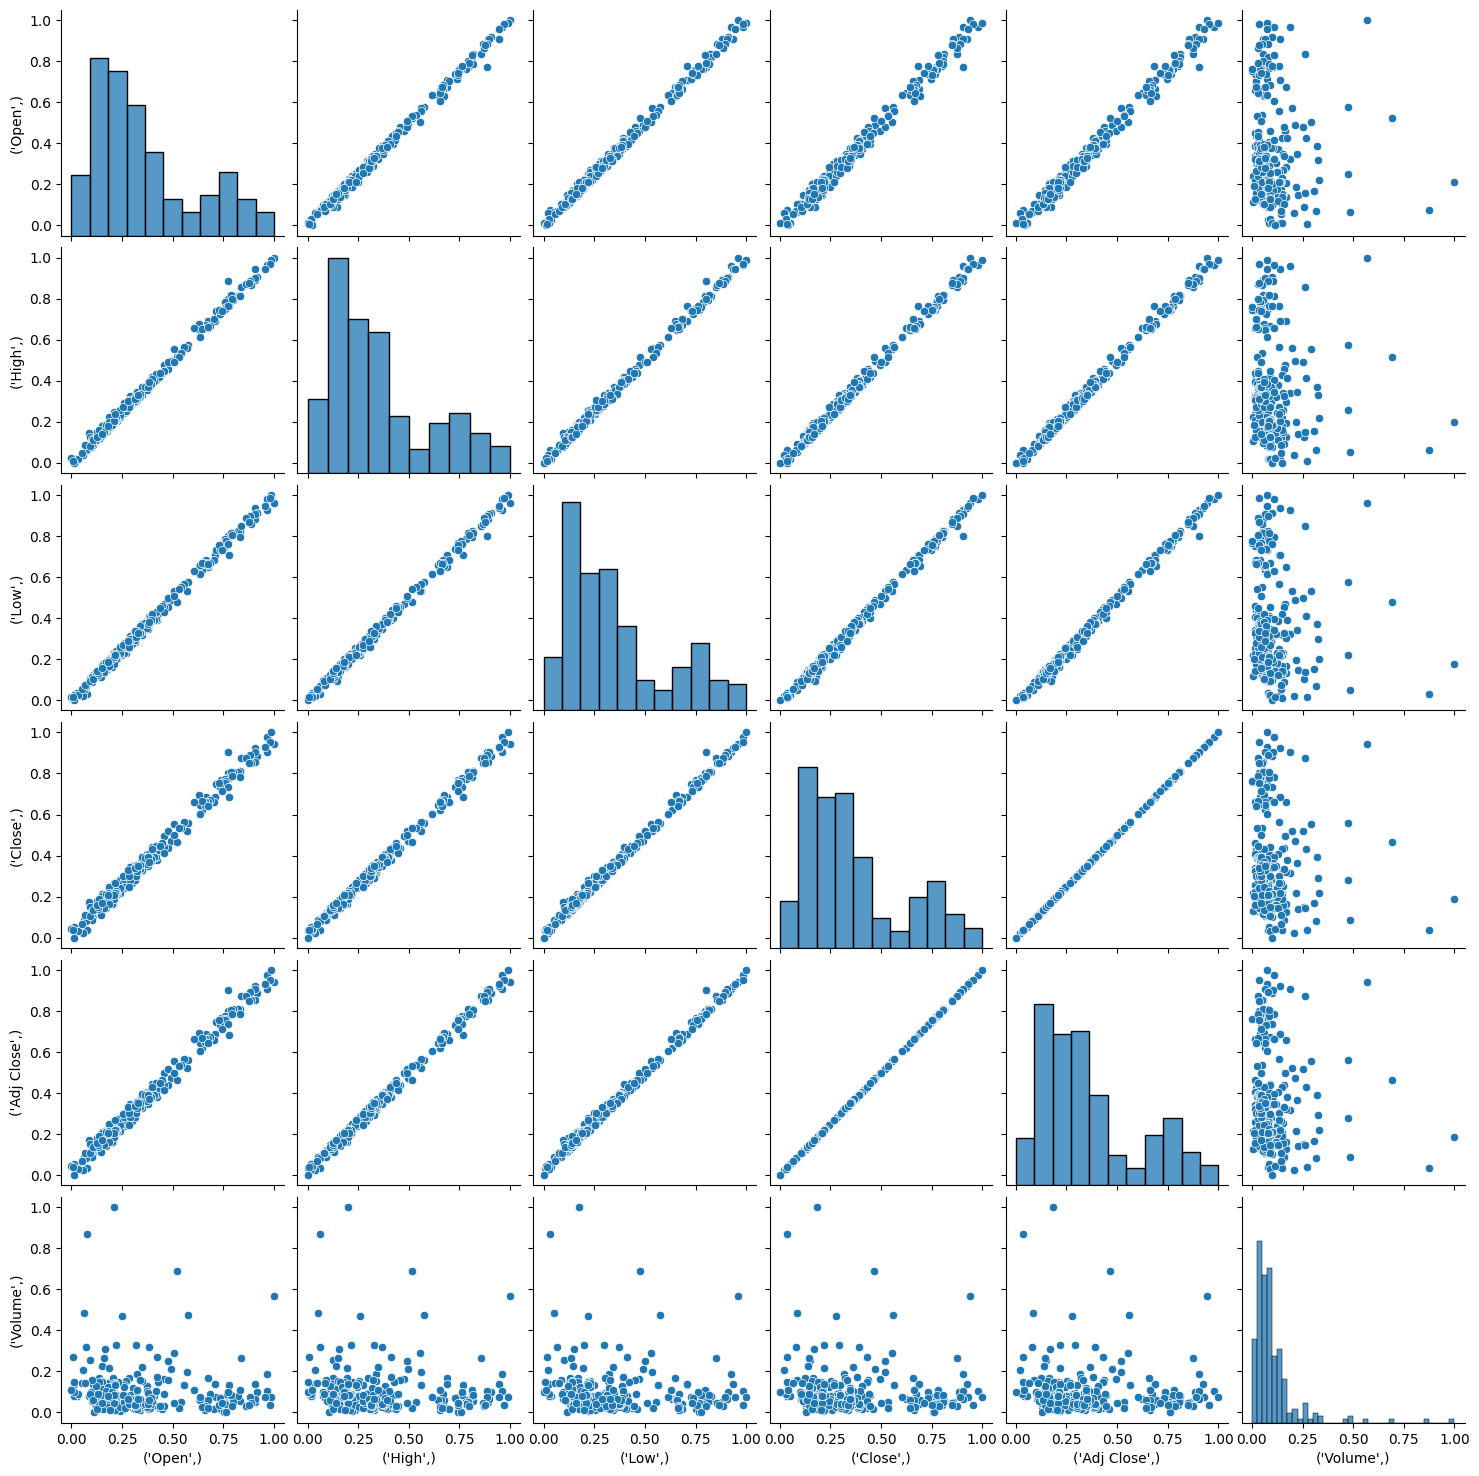

In [ ]:
sns.pairplot(df)

In [ ]:
df.describe().round(2)

,Open,High,Low,Close,Adj Close,Volume
count,251.00,251.00,251.00,251.00,251.00,251.00
mean,110.59,112.00,108.94,110.44,110.44,12575230.68
std,17.85,17.98,17.65,17.74,17.74,7608075.97
min,85.25,86.69,84.07,84.17,84.17,5858800.00
25%,96.79,98.03,95.40,96.47,96.47,8608550.00
50%,105.45,107.06,103.96,105.69,105.69,10793700.00
75%,119.08,120.86,117.04,117.98,117.98,13769550.00
max,156.02,157.50,153.75,156.35,156.35,70273500.00


**Normalization**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = scaler.fit_transform(df)

In [ ]:
df = pd.DataFrame(df, columns = [['Open','High','Low','Close','Adj Close', 'Volume']])

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
0,0.832839,0.817681,0.822474,0.809781,0.809781,0.056992
1,0.773633,0.781669,0.791906,0.773899,0.773899,0.061505
2,0.774198,0.797910,0.795924,0.801469,0.801469,0.034189
3,0.821534,0.810620,0.825775,0.808257,0.808257,0.078844
4,0.798926,0.793673,0.813289,0.807841,0.807841,0.052362
...,...,...,...,...,...,...
246,0.323866,0.325801,0.337256,0.353699,0.353699,0.051938
247,0.339268,0.337382,0.360075,0.351482,0.351482,0.068061
248,0.325138,0.314645,0.335964,0.324467,0.324467,0.041756
249,0.315529,0.311114,0.335534,0.336935,0.336935,0.037148


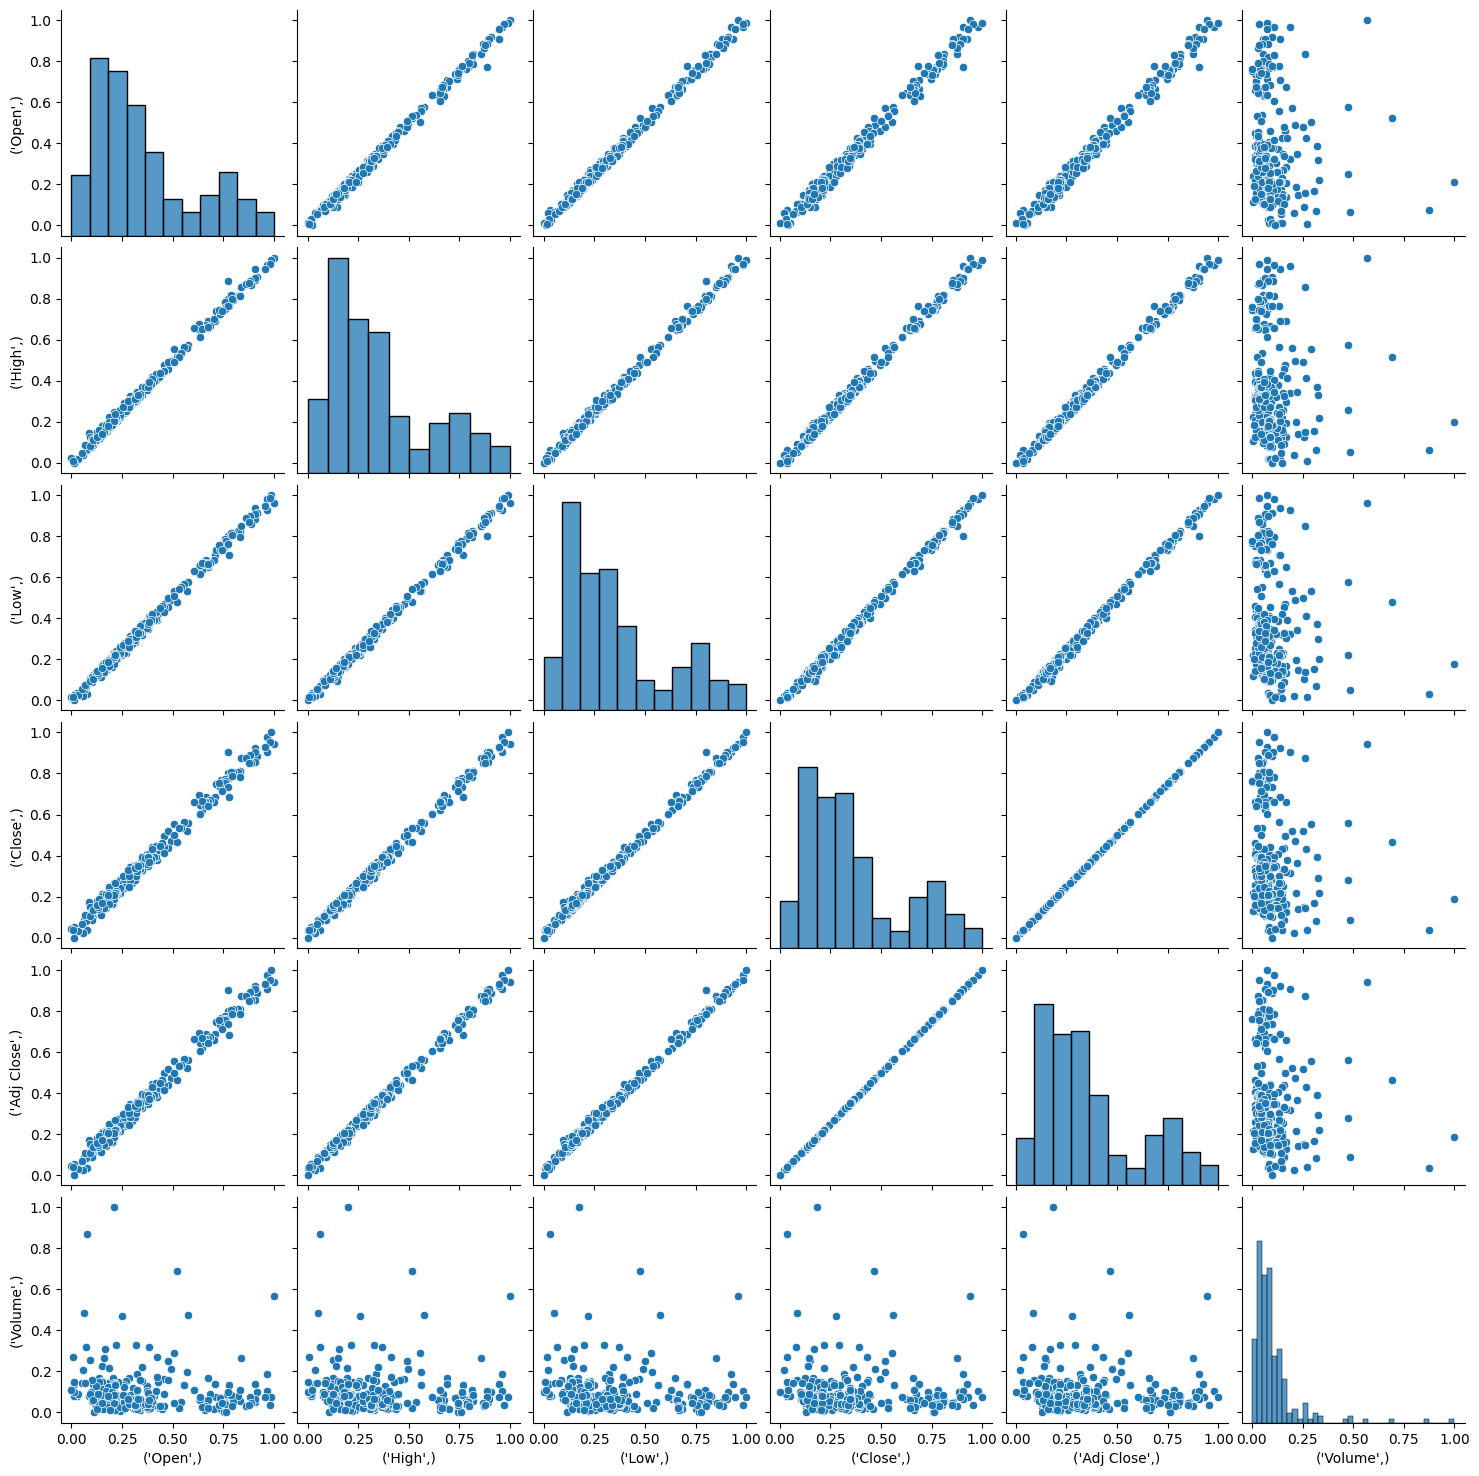

In [ ]:
sns.pairplot(df)

In [ ]:
df.describe().round(2)

,Open,High,Low,Close,Adj Close,Volume
count,251.00,251.00,251.00,251.00,251.00,251.00
mean,0.36,0.36,0.36,0.36,0.36,0.10
std,0.25,0.25,0.25,0.25,0.25,0.12
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.16,0.16,0.16,0.17,0.17,0.04
50%,0.29,0.29,0.29,0.30,0.30,0.08
75%,0.48,0.48,0.47,0.47,0.47,0.12
max,1.00,1.00,1.00,1.00,1.00,1.00


**Standardization**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = scaler.fit_transform(df)

In [ ]:
df = pd.DataFrame(df, columns = [['Open','High','Low','Close','Adj Close', 'Volume']])

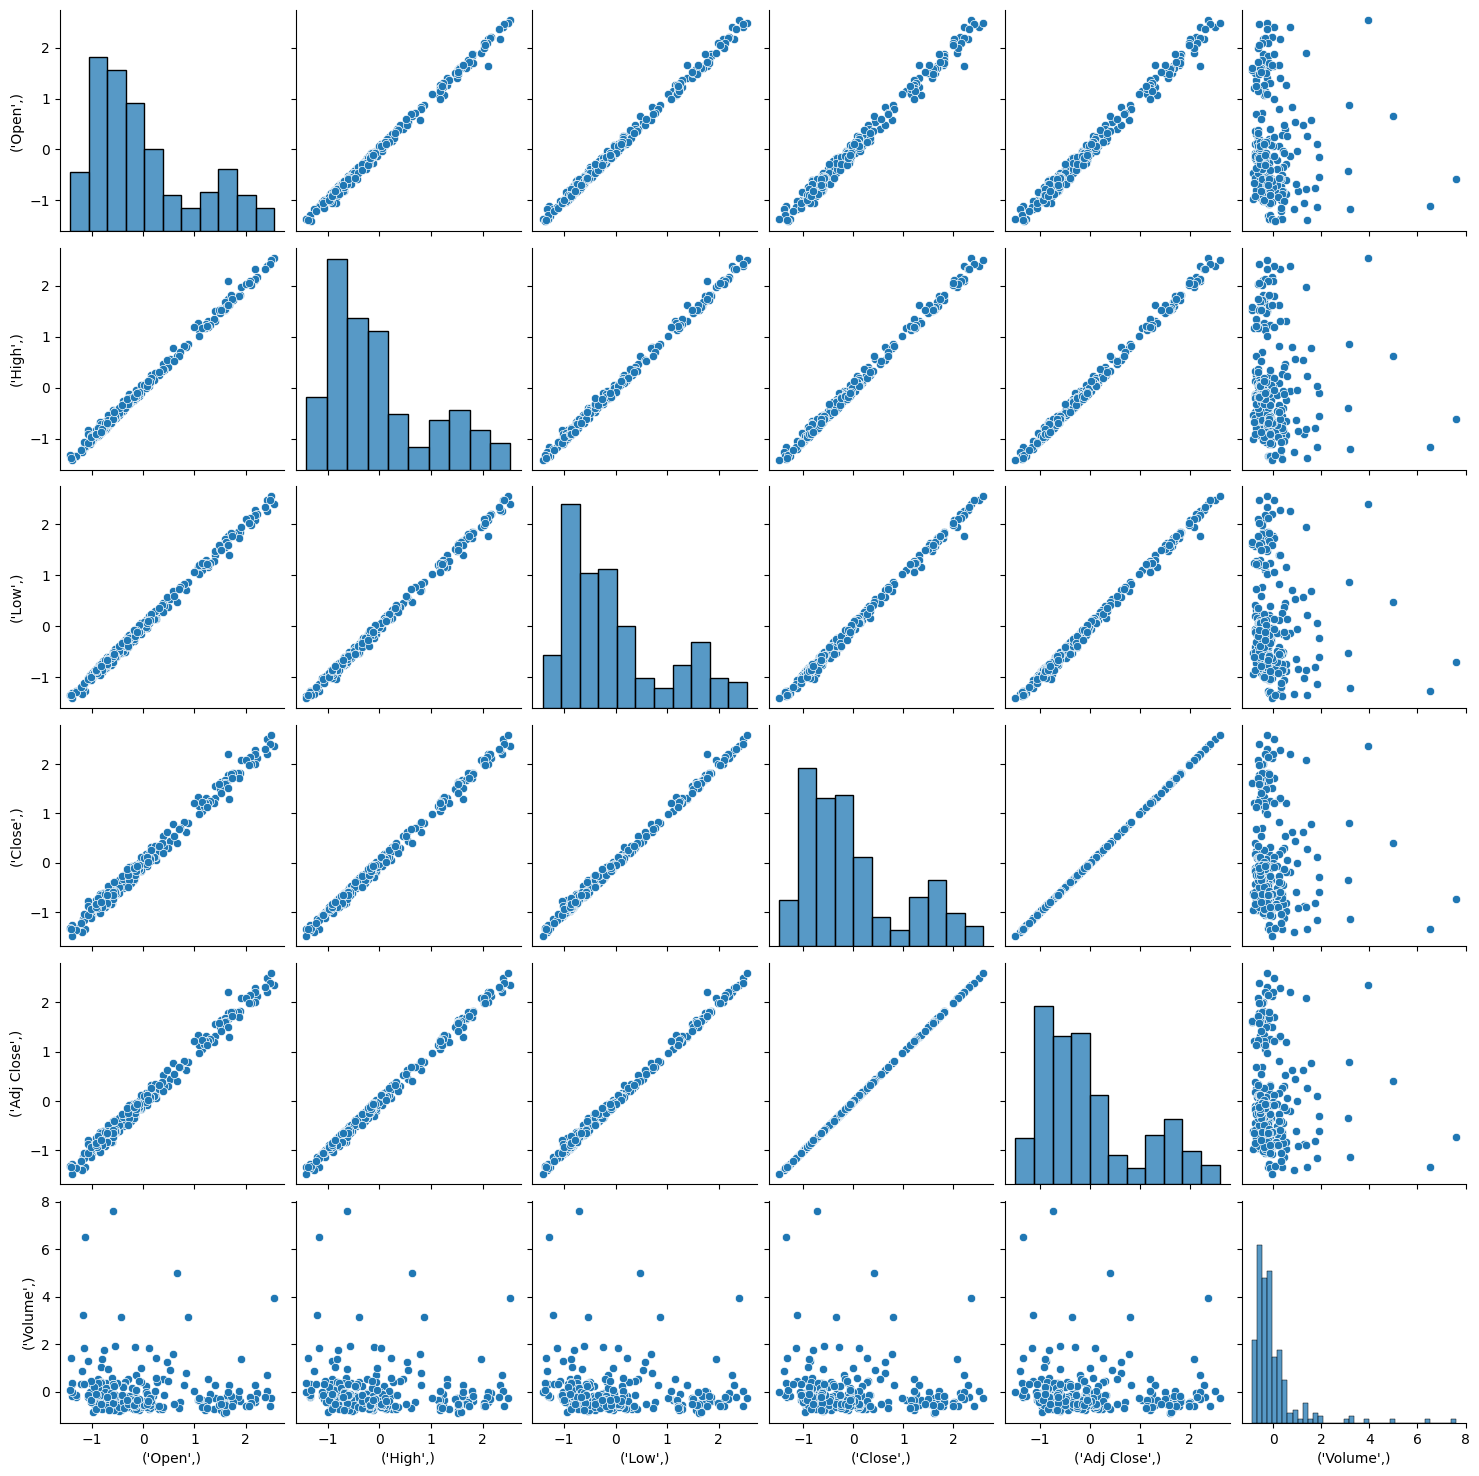

In [ ]:
sns.pairplot(df)

In [ ]:
df.describe().round(2)

,Open,High,Low,Close,Adj Close,Volume
count,251.00,251.00,251.00,251.00,251.00,251.00
mean,-0.00,0.00,-0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.42,-1.41,-1.41,-1.48,-1.48,-0.88
25%,-0.77,-0.78,-0.77,-0.79,-0.79,-0.52
50%,-0.29,-0.28,-0.28,-0.27,-0.27,-0.23
75%,0.48,0.49,0.46,0.43,0.43,0.16
max,2.55,2.54,2.54,2.59,2.59,7.60
